Begin pretraining:  ------------------------------------------------------------
Epoch 1/100
858/858 [==============================] - 77s 86ms/step - loss: 322.9062
Epoch 2/100
858/858 [==============================] - 87s 101ms/step - loss: 176.3795
Epoch 3/100
858/858 [==============================] - 102s 119ms/step - loss: 140.8445
Epoch 4/100
858/858 [==============================] - 83s 97ms/step - loss: 104.9905
Epoch 5/100
858/858 [==============================] - 94s 110ms/step - loss: 215.0486
Epoch 6/100
858/858 [==============================] - 79s 92ms/step - loss: 110.5626
Epoch 7/100
858/858 [==============================] - 80s 94ms/step - loss: 88.4924
Epoch 8/100
858/858 [==============================] - 84s 97ms/step - loss: 128.4900
Epoch 9/100
858/858 [==============================] - 78s 90ms/step - loss: 86.6833
Epoch 10/100
858/858 [==============================] - 72s 84ms/step - loss: 105.1844
Epoch 11/100
858/858 [==============================] - 

Epoch 95/100
858/858 [==============================] - 104s 121ms/step - loss: 49.3126
Epoch 96/100
858/858 [==============================] - 105s 123ms/step - loss: 60.5932
Epoch 97/100
858/858 [==============================] - 101s 118ms/step - loss: 46.1729
Epoch 98/100
858/858 [==============================] - 124s 144ms/step - loss: 46.1205
Epoch 99/100
858/858 [==============================] - 118s 138ms/step - loss: 50.1326
Epoch 100/100
858/858 [==============================] - 123s 144ms/step - loss: 51.5459
Pretraining time:  7478.200965642929
End pretraining:  ------------------------------------------------------------
Begin clustering: ------------------------------------------------------------
Update interval 50
Save interval 300
Initializing cluster centers with k-means.
1715/1715 [==============================] - 18s 10ms/step
saving model to: ./results/temp/model_final.h5
Clustering time: 249s
End clustering: ----------------------------------------------------

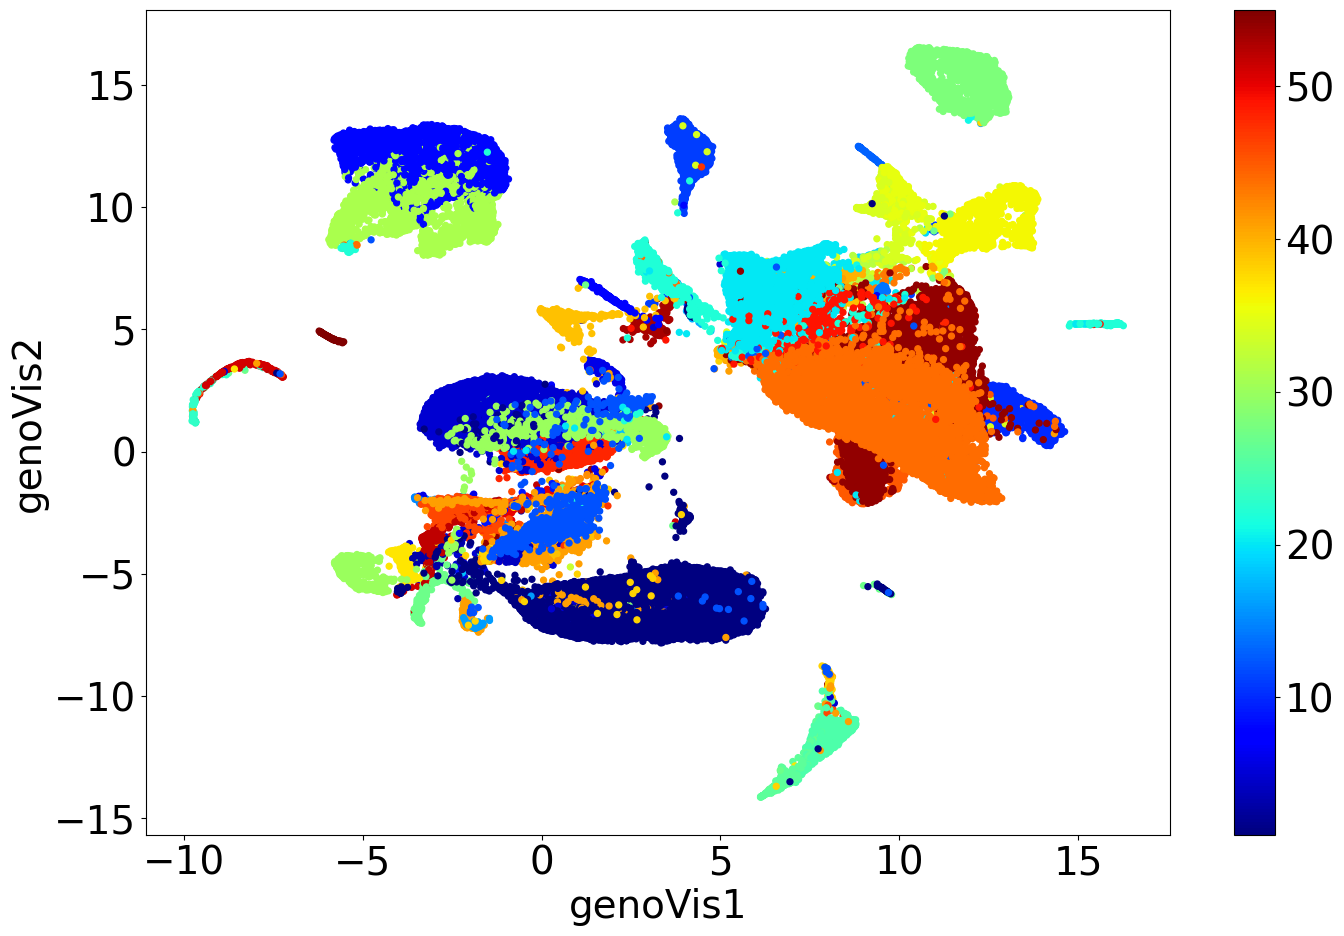

acc=0.4613, nmi=0.5825, ari=0.3420


In [2]:
##Perform PCA dimensionality reduction on the data, cluster and visualize using kmeans, cluster according to real labels,
#and visualize the clustering results.

import scipy.io as sio
import numpy as np
import pandas as pd
import genomap.genoVis as gp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import phate
import umap.umap_ as umap

data = pd.read_csv('TM_data.csv', header=None,
                   delim_whitespace=False)
data=data.values
gt_data = sio.loadmat('GT_TM.mat')
y = np.squeeze(gt_data['GT'])
n_clusters = len(np.unique(y))


resVis=gp.genoVis(data,n_clusters=n_clusters, colNum=33,rowNum=33)
# Use resVis=gp.genoVis(data, colNum=32,rowNum=32), if you dont know the number
# of classes in the data

resVisEmb=resVis[0] # Visualization result
clusIndex=resVis[1] # Clustering result

plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 28})    
h1=plt.scatter(resVisEmb[:, 0], resVisEmb[:, 1], c=y,cmap='jet', marker='o', s=18)      #  ax = plt.subplot(3, n, i + 1*10+1)
plt.xlabel('genoVis1')
plt.ylabel('genoVis2')
plt.tight_layout()
plt.colorbar(h1)
plt.show()

import genomap.utils.metrics as metrics
print('acc=%.4f, nmi=%.4f, ari=%.4f' % (metrics.acc(y, clusIndex), metrics.nmi(y, clusIndex), metrics.ari(y, clusIndex)))